In [1]:
reset -f

In [2]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras import regularizers
import os
import math

2023-11-19 16:13:16.349233: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [4]:
print(format(os.getcwd()))

/Users/amber/Documents/DAEN-690/dataset


In [5]:
path_to_file = '/Users/amber/Documents/DAEN-690/dataset/data_dnn/train_data_for_dnn_new.csv'
df = pd.read_csv(path_to_file, encoding = "ISO-8859-1",header=0, index_col=False)
print(df)
print(df.columns)

         EventID  FinalIncidentType  FinalEMScategory  calltime  \
0       12359126                  2                 2  0.002535   
1       12359150                  1                 1  0.008275   
2       12359162                  2                 2  0.010382   
3       12359162                  2                 2  0.010382   
4       12359066                  1                 1  0.022454   
...          ...                ...               ...       ...   
302199  14965991                  2                 2  0.265914   
302200  14966013                  1                 1  0.272037   
302201  14966013                  1                 1  0.272037   
302202  14966018                  1                 1  0.273380   
302203  14966018                  1                 1  0.273380   

        call_processing_time  travel_time  station_coord_x  station_coord_y  \
0                         85          352           94.982           553.01   
1                        113         

In [6]:
print(type(df['travel_time']))

<class 'pandas.core.series.Series'>


In [7]:
# One-Hot Encoding for 'FinalIncidentType', 'FinalEMScategory' and 'unit_type'
df_encode = pd.get_dummies(df, columns=['FinalIncidentType','FinalEMScategory', 'unit_type'], drop_first=True)

In [8]:
df_encode
#df_encode.to_csv("/Users/amber/Documents/DAEN-690/dataset/data_dnn/df1_encode.csv", index=False)

,EventID,calltime,call_processing_time,travel_time,station_coord_x,station_coord_y,incident_amount,unit_coord_x,unit_coord_y,response_time,response_time_for_unit,FinalIncidentType_2,FinalIncidentType_3,FinalIncidentType_4,FinalIncidentType_5,FinalIncidentType_6,FinalEMScategory_2,unit_type_2,unit_type_3,unit_type_4
0,12359126,0.002535,85,352,94.982,553.01,4038,94.982,553.01,502,501,True,False,False,False,False,True,True,False,False
1,12359150,0.008275,113,292,288.980,818.70,4651,383.160,898.83,299,439,False,False,False,False,False,False,True,False,False
2,12359162,0.010382,131,188,831.600,648.61,4878,831.600,648.61,413,414,True,False,False,False,False,True,False,False,False
3,12359162,0.010382,131,190,831.600,648.61,4878,831.600,648.61,413,412,True,False,False,False,False,True,True,False,False
4,12359066,0.022454,36,205,187.760,852.44,4956,288.980,818.70,351,351,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302199,14965991,0.265914,180,302,705.080,114.42,6719,930.000,177.68,593,593,True,False,False,False,False,True,False,True,False
302200,14966013,0.272037,98,314,705.080,114.42,6719,705.080,114.42,524,553,False,False,False,False,False,False,False,False,False
302201,14966013,0.272037,98,371,705.080,114.42,6719,705.080,114.42,524,524,False,False,False,False,False,False,True,False,False
302202,14966018,0.273380,87,211,828.780,242.34,3101,828.780,242.34,385,385,False,False,False,False,False,False,False,False,False


In [9]:
df1 = pd.read_csv("/Users/amber/Documents/DAEN-690/dataset/data_dnn/df1_encode.csv", encoding = "ISO-8859-1",header=0, index_col=False)
print(df1)
print(df1.columns)

         EventID  calltime  call_processing_time  travel_time  \
0       12359126  0.002535                    85          352   
1       12359150  0.008275                   113          292   
2       12359162  0.010382                   131          188   
3       12359162  0.010382                   131          190   
4       12359066  0.022454                    36          205   
...          ...       ...                   ...          ...   
302199  14965991  0.265914                   180          302   
302200  14966013  0.272037                    98          314   
302201  14966013  0.272037                    98          371   
302202  14966018  0.273380                    87          211   
302203  14966018  0.273380                    87          247   

        station_coord_x  station_coord_y  incident_amount  unit_coord_x  \
0                94.982           553.01             4038        94.982   
1               288.980           818.70             4651       383.1

In [10]:
deformation = df1.iloc[:,-1]/10

In [11]:
x_data = df1.iloc[:,df1.columns != 'response_time_for_unit']
#x_data = x_data.iloc[:,x_data.columns != 'FinalIncidentType']
x_data = x_data.iloc[:,x_data.columns != 'EventID']
#x_data = x_data.iloc[:,x_data.columns != 'unit_coord_y']
#x_data = x_data.iloc[:,x_data.columns != 'incident_duration']
x_data = x_data.iloc[:,x_data.columns != 'response_time']

print(x_data.columns)

Index(['calltime', 'call_processing_time', 'travel_time', 'station_coord_x',
       'station_coord_y', 'incident_amount', 'unit_coord_x', 'unit_coord_y',
       'FinalIncidentType_Medical', 'FinalIncidentType_ACCIF',
       'FinalIncidentType_ODF', 'FinalIncidentType_CPRF',
       'FinalIncidentType_Others', 'FinalEMScategory_B', 'unit_type_ALS',
       'unit_type_BLS', 'unit_type_Rescue'],
      dtype='object')


In [12]:
print(x_data.shape)

(302204, 17)


In [13]:
cols = []
count = 1
for column in x_data.columns:
    cols.append(f'Number_{count}')
    count = count + 1
    continue

x_data.columns = cols

In [14]:
#Creating Feature Columns
feat_cols=[]
for cols in x_data.columns:
    column= tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
#print(feat_cols)
print(type(feat_cols))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
<class 'list'>


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler_model = MinMaxScaler()
scaler_model.fit(x_data)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MinMaxScaler()

In [16]:
#np.savetxt('hxp_mean.txt', scaler_model.mean_, fmt='%2.5f')
#np.savetxt('hxp_var.txt', scaler_model.var_, fmt='%2.5f')

In [17]:
X_train, X_eval,y_train,y_eval=train_test_split(x_data,deformation,test_size=0.25,random_state=1)
print(X_eval)
print(y_eval)

        Number_1  Number_2  Number_3  Number_4  Number_5  Number_6  Number_7  \
145854  0.783426        88       369    740.22    631.74      5693    740.22   
101062  0.367905       106       292   1034.00    245.15     10691   1034.00   
288686  0.548079       119       178   1034.00    245.15     10691   1034.00   
273287  0.397431       101       133    187.76    852.44      4956    187.76   
253065  0.310093        51       239    533.58    919.92      1815    533.58   
...          ...       ...       ...       ...       ...       ...       ...   
243799  0.350648        82       339    861.12    364.64      6538    861.12   
192059  0.793056       199       497    383.16    898.83      7350    383.16   
279932  0.839826       165       253   1034.00    245.15     10691   1034.00   
83116   0.346146        95       227    766.93    315.44      9909    766.93   
280335  0.990521        74       583    312.87    571.29      4097    298.82   

        Number_8  Number_9  Number_10  

In [18]:
X_train=pd.DataFrame(scaler_model.transform(X_train),columns=X_train.columns,index=X_train.index)

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [19]:
X_eval=pd.DataFrame(scaler_model.transform(X_eval),columns=X_eval.columns,index=X_eval.index)
print(X_eval)

        Number_1  Number_2  Number_3  Number_4  Number_5  Number_6  Number_7  \
145854  0.783420  0.256757  0.545648  0.687141  0.592065  0.479104  0.687141   
101062  0.367865  0.317568  0.382166  1.000000  0.216902  0.923528  1.000000   
288686  0.548054  0.361486  0.140127  1.000000  0.216902  0.923528  1.000000   
273287  0.397393  0.300676  0.044586  0.098803  0.806242  0.413569  0.098803   
253065  0.310048  0.131757  0.269639  0.467082  0.871727  0.134270  0.467082   
...          ...       ...       ...       ...       ...       ...       ...   
243799  0.350607  0.236486  0.481953  0.815893  0.332860  0.554242  0.815893   
192059  0.793050  0.631757  0.817410  0.306893  0.851260  0.626445  0.306893   
279932  0.839825  0.516892  0.299363  1.000000  0.216902  0.923528  1.000000   
83116   0.346104  0.280405  0.244161  0.715586  0.285115  0.853993  0.715586   
280335  0.990532  0.209459  1.000000  0.232038  0.533402  0.337187  0.217076   

        Number_8  Number_9  Number_10  

/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amber/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [20]:
#print((0.74558053-0.5002686206)/np.sqrt(0.0418660216))
#print(X_eval)

In [21]:
# Neural network
model = Sequential()
model.add(Dense(64, input_dim = 17, kernel_initializer = 'random_normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='relu'))

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanAbsolutePercentageError'])

In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data=(X_eval, y_eval), shuffle=True)

Epoch 1/100
227/227 [==============================] - 1s 3ms/step - loss: 741.6763 - mean_absolute_percentage_error: 51.5907 - val_loss: 130.1236 - val_mean_absolute_percentage_error: 23.3967
Epoch 2/100
227/227 [==============================] - 0s 2ms/step - loss: 98.8208 - mean_absolute_percentage_error: 20.4794 - val_loss: 67.9102 - val_mean_absolute_percentage_error: 17.0039
Epoch 3/100
227/227 [==============================] - 1s 2ms/step - loss: 39.7385 - mean_absolute_percentage_error: 12.8819 - val_loss: 19.2283 - val_mean_absolute_percentage_error: 8.9570
Epoch 4/100
227/227 [==============================] - 1s 2ms/step - loss: 14.1741 - mean_absolute_percentage_error: 7.5596 - val_loss: 12.1702 - val_mean_absolute_percentage_error: 6.8149
Epoch 5/100
227/227 [==============================] - 1s 2ms/step - loss: 12.0057 - mean_absolute_percentage_error: 6.7716 - val_loss: 11.8613 - val_mean_absolute_percentage_error: 6.6578
Epoch 6/100
227/227 [===========================

Epoch 88/100
227/227 [==============================] - 1s 3ms/step - loss: 9.2545 - mean_absolute_percentage_error: 5.7150 - val_loss: 9.2986 - val_mean_absolute_percentage_error: 5.6845
Epoch 89/100
227/227 [==============================] - 1s 2ms/step - loss: 9.2779 - mean_absolute_percentage_error: 5.7232 - val_loss: 9.2797 - val_mean_absolute_percentage_error: 5.7201
Epoch 90/100
227/227 [==============================] - 1s 2ms/step - loss: 9.2654 - mean_absolute_percentage_error: 5.7182 - val_loss: 9.2878 - val_mean_absolute_percentage_error: 5.7030
Epoch 91/100
227/227 [==============================] - 1s 3ms/step - loss: 9.2771 - mean_absolute_percentage_error: 5.7252 - val_loss: 9.2738 - val_mean_absolute_percentage_error: 5.6957
Epoch 92/100
227/227 [==============================] - 1s 3ms/step - loss: 9.2631 - mean_absolute_percentage_error: 5.7183 - val_loss: 9.3813 - val_mean_absolute_percentage_error: 5.6876
Epoch 93/100
227/227 [==============================] - 1s 3

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


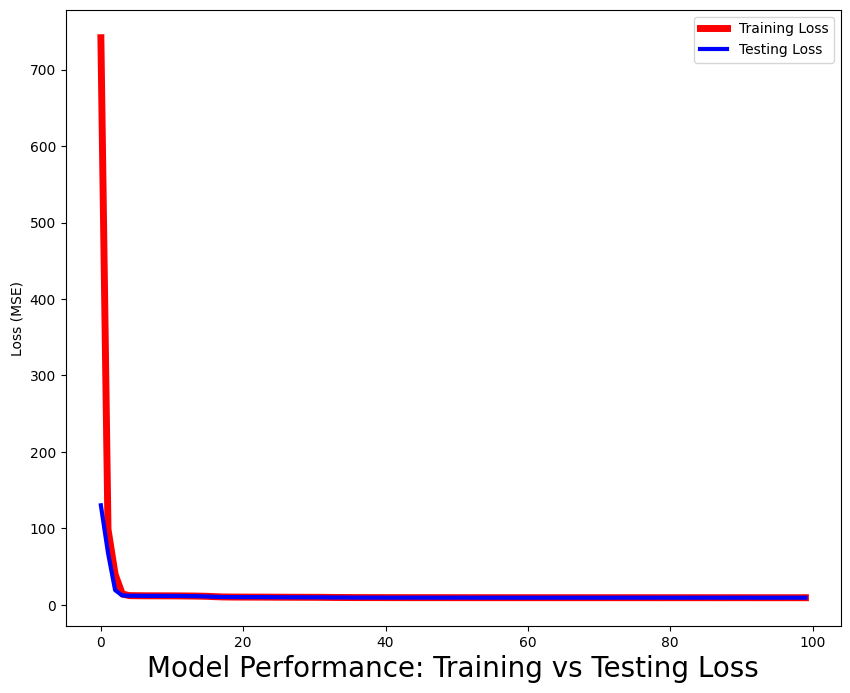

In [29]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(history.history['loss'], 'r-', label='Training Loss', linewidth=5.0)
plt.plot(history.history['val_loss'], 'b-', label='Testing Loss', linewidth=3.0)
###plt.plot(testing_losses, 'b-', label='Testing Loss', linewidth=3.0)
###plt.ylim((0, 800))
plt.xlabel('Model Performance: Training vs Testing Loss', fontsize=20)
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [ ]:
# manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(history.history['loss'],'r-',linewidth=3.0) 
plt.ylim((0,800))
plt.xlabel('DNN Training steps', fontsize = 20)
plt.ylabel('Loss (MSE)')
plt.show()

In [ ]:
ytrain_pred = model.predict(X_train,batch_size=None)
from sklearn.metrics import r2_score
R2 = r2_score(y_train,ytrain_pred)
print(R2)

In [ ]:
y_pred = model.predict(X_eval,batch_size=None)
from sklearn.metrics import r2_score
R2 = r2_score(y_eval,y_pred)
print(R2)

In [ ]:
frd = []
for i in range(len(y_pred)):
    frd.append(y_pred[i,0])
mse = keras.losses.MeanSquaredError()
rmse = math.sqrt(mse(y_eval.to_numpy(), frd).numpy())
print(f'MSE is {mse(y_eval.to_numpy(), frd).numpy()}')
print(f'RMSE is {rmse}')
R2 = r2_score(y_eval,frd)
print(f'R2 Score is {R2}')

In [ ]:
history.history['loss']

In [ ]:
testing_loss = mean_squared_error(y_eval, y_pred)

plt.rcParams['figure.figsize'] = [10, 8]
#plt.plot(history.history['loss'], 'r-', label='Training Loss', linewidth=3.0)
plt.plot(testing_loss, 'b-', label='Testing Loss', linewidth=3.0)
#plt.ylim((0, 1))
plt.xlabel('DNN Training steps', fontsize=20)
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(y_pred[:200], color = 'blue', label = 'Predicted data')
plt.plot(y_eval.values[:200], color = 'red', label = 'Real test data')
plt.legend(fontsize=20)
plt.ylabel('Response Time')
plt.show()

In [ ]:
#frd_1 = model.layers[0].get_weights()
#frd_2 = model.layers[1].get_weights()
#frd_3 = model.layers[2].get_weights()
#frd_4 = model.layers[3].get_weights()

In [ ]:
#np.savetxt('weight_layer1.txt', frd_1[0], fmt='%f')
#np.savetxt('bias_layer1.txt', frd_1[1], fmt='%f')
#np.savetxt('weight_layer2.txt', frd_2[0], fmt='%f')
#np.savetxt('bias_layer2.txt', frd_2[1], fmt='%f')
#np.savetxt('weight_layer3.txt', frd_3[0], fmt='%f')
#np.savetxt('bias_layer3.txt', frd_3[1], fmt='%f')
#np.savetxt('weight_layer4.txt', frd_4[0], fmt='%f')
#np.savetxt('bias_layer4.txt', frd_4[1], fmt='%f')

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(y_eval.values,y_pred, color = 'blue')
plt.plot(y_eval.values, y_eval.values,color = 'red',linewidth = 3.0)
plt.xlim((20,150))
plt.ylim((20,150))
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x=y_eval.values, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.ylim(0,3000)

In [ ]:
plt.figure(figsize = (10,8))
n, bins, patches = plt.hist(x=deformation, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.ylim(0,12000)

In [ ]:
print(solution1_pred)

In [ ]:
df_solution1_pred = pd.DataFrame(solution1_pred)
df_solution1_pred.to_csv("solution1_predictive_result.csv", index=False)

In [ ]:
########## Test solution - partition
solution2_path = '/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_partition/partition_dataset_new.csv'
solution2_data =  pd.read_csv(solution2_path, encoding = "ISO-8859-1",header=0, index_col=False)
print(type(solution2_data))
print(solution2_data.columns)

In [ ]:
# One-Hot Encoding for 'FinalIncidentType', 'FinalEMScategory' and 'unit_type'
solution2_encode = pd.get_dummies(solution2_data, columns=['FinalIncidentType','FinalEMScategory', 'unit_type'], drop_first=True)

In [ ]:
solution2_encode

In [ ]:
#solution2_encode.to_csv('/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_partition/partition_new_encode.csv', index=False)

In [ ]:
solution2_test = pd.read_csv('/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_partition/partition_new_encode.csv', encoding = "ISO-8859-1",header=0, index_col=False)
print(type(solution2_test))
print(solution2_test.columns)

In [ ]:
solution2_data_x = solution2_test.iloc[:,solution2_test.columns != 'actual_response_time']
solution2_data_x = solution2_data_x.iloc[:,solution2_data_x.columns != 'UnitId']
solution2_data_x = solution2_data_x.iloc[:,solution2_data_x.columns != 'EventID']
solution2_data_x = solution2_data_x.iloc[:,solution2_data_x.columns != 'GeoFirstDue']
solution2_data_x = solution2_data_x.iloc[:,solution2_data_x.columns != 'response_time']


print(solution2_data_x.columns)

In [ ]:
cols = []
count = 1
for column in solution2_data_x.columns:
    cols.append(f'Number_{count}')
    count = count + 1
    continue

solution2_data_x.columns = cols

In [ ]:
#Creating Feature Columns
feat_cols=[]
for cols in solution2_data_x.columns:
    column= tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
#print(feat_cols)
print(type(feat_cols))

In [ ]:
X_solution2_data=pd.DataFrame(scaler_model.transform(solution2_data_x),columns=solution2_data_x.columns,index=solution2_data_x.index)
print(X_solution2_data)

In [ ]:
solution2_pred = model.predict(X_solution2_data,batch_size=None)

In [ ]:
print(solution2_pred)

In [ ]:
df_solution2_pred = pd.DataFrame(solution2_pred)
df_solution2_pred.to_csv("/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_partition/solution2_predictive_result.csv", index=False)

In [ ]:
############## Test solution - greedy
solution3_path = '/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_greedy/greedy_dataset_new.csv'
solution3_data =  pd.read_csv(solution3_path, encoding = "ISO-8859-1",header=0, index_col=False)
print(type(solution3_data))
print(solution3_data.columns)

In [ ]:
# One-Hot Encoding for 'FinalIncidentType', 'FinalEMScategory' and 'unit_type'
solution3_encode = pd.get_dummies(solution3_data, columns=['FinalIncidentType','FinalEMScategory', 'unit_type'], drop_first=True)

In [ ]:
solution3_encode

In [ ]:
solution3_encode.to_csv('/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_greedy/greedy_new_encode.csv', index=False)

In [ ]:
solution3_test = pd.read_csv('/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_greedy/greedy_new_encode.csv', encoding = "ISO-8859-1",header=0, index_col=False)
print(type(solution3_test))
print(solution3_test.columns)

In [ ]:
solution3_data_x = solution3_test.iloc[:,solution3_test.columns != 'actual_response_time']
solution3_data_x = solution3_data_x.iloc[:,solution3_data_x.columns != 'UnitId']
solution3_data_x = solution3_data_x.iloc[:,solution3_data_x.columns != 'EventID']
solution3_data_x = solution3_data_x.iloc[:,solution3_data_x.columns != 'GeoFirstDue']
solution3_data_x = solution3_data_x.iloc[:,solution3_data_x.columns != 'response_time']


print(solution3_data_x.columns)

In [ ]:
cols = []
count = 1
for column in solution3_data_x.columns:
    cols.append(f'Number_{count}')
    count = count + 1
    continue

solution3_data_x.columns = cols

In [ ]:
#Creating Feature Columns
feat_cols=[]
for cols in solution3_data_x.columns:
    column= tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
#print(feat_cols)
print(type(feat_cols))

In [ ]:
X_solution3_data=pd.DataFrame(scaler_model.transform(solution3_data_x),columns=solution3_data_x.columns,index=solution3_data_x.index)
print(X_solution3_data)

In [ ]:
solution3_pred = model.predict(X_solution3_data,batch_size=None)

In [ ]:
print(solution3_pred)

In [ ]:
df_solution3_pred = pd.DataFrame(solution3_pred)
df_solution3_pred.to_csv("/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution_greedy/solution3_predictive_result.csv", index=False)

In [ ]:
############## Test solution1
solution1_path = '/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution1/solution1_dataset_new.csv'
solution1_data =  pd.read_csv(solution1_path, encoding = "ISO-8859-1",header=0, index_col=False)
print(type(solution1_data))
print(solution1_data.columns)

In [ ]:
# One-Hot Encoding for 'FinalIncidentType', 'FinalEMScategory' and 'unit_type'
solution1_encode = pd.get_dummies(solution1_data, columns=['FinalIncidentType','FinalEMScategory', 'unit_type'], drop_first=True)

In [ ]:
solution1_encode

In [ ]:
solution1_encode.to_csv('/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution1/solution1_encode.csv', index=False)

In [ ]:
solution1_test = pd.read_csv('/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution1/solution1_encode.csv', encoding = "ISO-8859-1",header=0, index_col=False)
print(type(solution1_test))
print(solution1_test.columns)

In [ ]:
solution1_data_x = solution1_test.iloc[:,solution1_test.columns != 'actual_response_time']
solution1_data_x = solution1_data_x.iloc[:,solution1_data_x.columns != 'UnitId']
solution1_data_x = solution1_data_x.iloc[:,solution1_data_x.columns != 'EventID']
solution1_data_x = solution1_data_x.iloc[:,solution1_data_x.columns != 'GeoFirstDue']
solution1_data_x = solution1_data_x.iloc[:,solution1_data_x.columns != 'response_time']


print(solution1_data_x.columns)

In [ ]:
cols = []
count = 1
for column in solution1_data_x.columns:
    cols.append(f'Number_{count}')
    count = count + 1
    continue

solution1_data_x.columns = cols

In [ ]:
#Creating Feature Columns
feat_cols=[]
for cols in solution1_data_x.columns:
    column= tf.feature_column.numeric_column(cols)
    feat_cols.append(column)
    
#print(feat_cols)
print(type(feat_cols))

In [ ]:
X_solution1_data=pd.DataFrame(scaler_model.transform(solution1_data_x),columns=solution1_data_x.columns,index=solution1_data_x.index)
print(X_solution1_data)

In [ ]:
solution1_pred = model.predict(X_solution1_data,batch_size=None)

In [ ]:
print(solution1_pred)

In [ ]:
df_solution1_pred = pd.DataFrame(solution1_pred)
df_solution1_pred.to_csv("/Users/amber/Documents/DAEN-690/dataset/data_dnn/solution1/solution1_predictive_result.csv", index=False)